In [15]:
from CTGAN import *
from sdv.metrics.tabular import (BinaryDecisionTreeClassifier, 
                                 BinaryAdaBoostClassifier,
                                 BinaryLogisticRegression,
                                 BinaryMLPClassifier,
                                 LogisticDetection, 
                                 SVCDetection)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Setup

In [3]:
i_ds1 = SDVInputDataset(filepath='../data/back_pain.csv',
                       header=0)
o_ds1 = SDVOutputDataset(len(i_ds1.dataset))
rp_ds1 = SDVUniversalParams(models_to_run=['ctgan', 'copulagan', 'tvae'])

In [4]:
i_ds1.dataset.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [5]:
rp_ds1.models_to_run

['ctgan', 'copulagan', 'tvae']

# Generate Data

In [6]:
test_dict = sdv_dataset_synthesizer(input_dataset=i_ds1,
                            output_dataset=o_ds1,
                            run_params=rp_ds1)

H:\Users\albat\anaconda3\envs\syn_data_hackathon_gan\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
H:\Users\albat\anaconda3\envs\syn_data_hackathon_gan\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
H:\Users\albat\anaconda3\envs\syn_data_hackathon_gan\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
H:\Users\albat\anaconda3\envs\syn_data_hackathon_gan\lib\site-

H:\Users\albat\anaconda3\envs\syn_data_hackathon_gan\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
H:\Users\albat\anaconda3\envs\syn_data_hackathon_gan\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
H:\Users\albat\anaconda3\envs\syn_data_hackathon_gan\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
H:\Users\albat\anaconda3\envs\syn_data_hackathon_gan\lib\site-packages\sklearn\utils

H:\Users\albat\anaconda3\envs\syn_data_hackathon_gan\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
H:\Users\albat\anaconda3\envs\syn_data_hackathon_gan\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
H:\Users\albat\anaconda3\envs\syn_data_hackathon_gan\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
H:\Users\albat\anaconda3\envs\syn_data_hackathon_gan\lib\site-packages\sklearn\utils

Running for ctgan
Running for copulagan
Running for tvae


In [17]:
test_dict['real'] = i_ds1.dataset

In [7]:
for item in test_dict.keys():
    print(item)

ctgan
copulagan
tvae


# Explore Datasets

In [ ]:
test_dict['ctgan']

In [ ]:
test_dict['copulagan']

In [ ]:
test_dict['tvae']

## Dataset characteristics

In [ ]:
test_dict['ctgan'].describe()

In [ ]:
test_dict['copulagan'].describe()

In [ ]:
test_dict['tvae'].describe()

# Assessment Functions

The output of the metrics will be the 1 minus the average ROC AUC score across all the cross validation splits.

In [8]:
def compare_methods_column_pairs(dict_of_dfs, col1, col2):
    fig, ax = plt.subplots(2,2, figsize=(8,8), sharex=True, sharey=True)
    for i, (name, df) in enumerate(dict_of_dfs.items()):
        df.plot(kind='scatter', x=col1, y=col2, 
                title=name, ax=ax.flatten()[i])
    plt.tight_layout()

In [9]:
def check_formats(dict_of_dfs, input_dataset):
    "Comparing with real dataframe"
    for name, df in dict_of_dfs.items():
        if name != "real":
            print(f"Column names the same for {name}: {np.all(df.columns == input_dataset.dataset.columns)}")
            print(f"Data types the same for {name}: {np.all(df.dtypes == input_dataset.dataset.dtypes)}")
            print()

In [10]:
def corr_plot(dict_of_dfs):
    fig, ax = plt.subplots(2,2, figsize=(8,8), sharex=True, sharey=True)
    for i, (name, df) in enumerate(dict_of_dfs.items()):
        sns.heatmap(df.corr(), ax=ax.flatten()[i])
        ax.flatten()[i].set_title(name)
    plt.tight_layout()

In [11]:
def simple_metrics(dict_of_dfs, input_dataset):
    results = []
    
    metrics_dict = {"Logistic Detection Score": LogisticDetection,
                    "SVC Detection Score": SVCDetection}
    
    for metric_name, metric in metrics_dict.items(): 
        
        for name, df in dict_of_dfs.items():
            result = LogisticDetection.compute(input_dataset.dataset, df)
            
            results.append({'Model': name, 
                            "Classifier": metric_name,
                            "Result": result})
    return pd.DataFrame(results)

In [12]:
def classifier_comparison(dict_of_dfs, target_col):
    classifier_dict = {
        "Decision Tree": BinaryDecisionTreeClassifier, 
        "AdaBoost": BinaryAdaBoostClassifier,
        "Logistic Regression": BinaryLogisticRegression,
        "MLP Classifier": BinaryMLPClassifier
    }
    
    results = []
    
    for classifier_name, classifier in classifier_dict.items():

        for name, df in dict_of_dfs.items():
            train, test = train_test_split(df, test_size=0.2, random_state=42)
            result = classifier.compute(train, test, target=target_col)
            results.append({'Model': name, 
                            "Classifier": classifier_name,
                            "Result": result})
    return pd.DataFrame(results)

In [13]:
def plot_classifier_metrics(classifier_metrics_df):
    fig, ax = plt.subplots(1,1, figsize=(10, 6))
    sns.barplot(x='Classifier', y='Result', hue='Model', 
                data=classifier_metrics_df, 
                ax=ax)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title('1 - AUC ROC (Higher = Better)')
    plt.ylim((0,1.1));

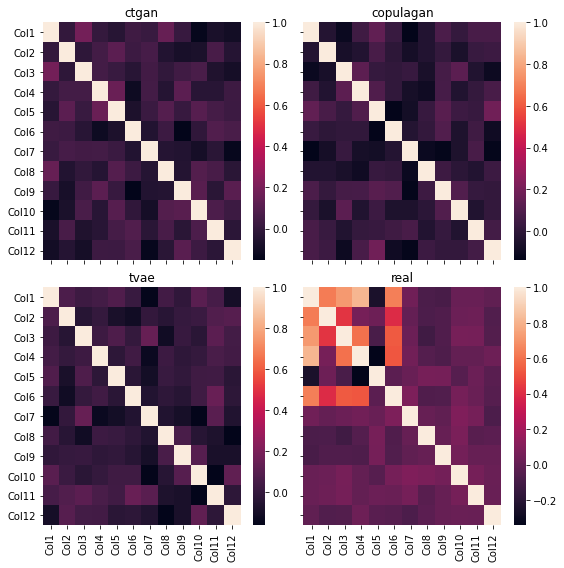

In [18]:
corr_plot(test_dict)

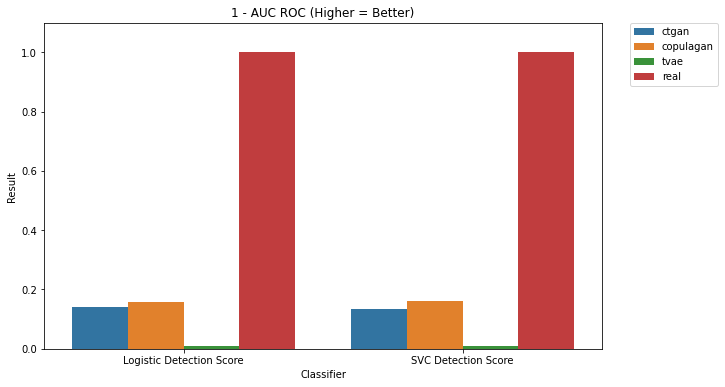

In [19]:
plot_classifier_metrics(simple_metrics(test_dict, input_dataset=i_ds1))

H:\Users\albat\anaconda3\envs\syn_data_hackathon_gan\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
H:\Users\albat\anaconda3\envs\syn_data_hackathon_gan\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
H:\Users\albat\anaconda3\envs\syn_data_hackathon_gan\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
H:\Users\albat\anaconda3\envs\syn_data_hackathon_gan\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization has

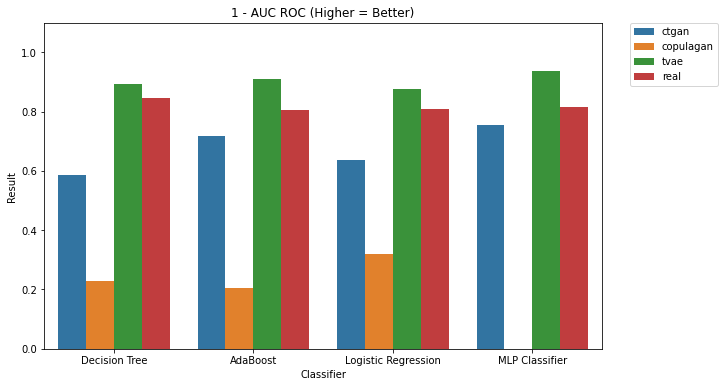

In [20]:
plot_classifier_metrics(classifier_comparison(test_dict, target_col='Class_att'))